## IMPORTING LIBRARIES

In [3]:
import polars as pl
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import warnings           # for warnings in the code 
import statsmodels.api as sm
warnings.filterwarnings('ignore')   # ignore the warnings

# Setting Working Directory

In [6]:
import os
os.chdir("C:\\Users\\riya8\\Desktop\\Hypothesis testing project")

## LOADING THE DATASET

In [9]:
df = pl.read_csv(
    "2023_Yellow_Taxi_Trip_Data.csv",
    columns = [ "passenger_count","payment_type","fare_amount", "trip_distance","tpep_pickup_datetime", "tpep_dropoff_datetime"],
    
)

In [10]:
df = df.select( ["passenger_count","payment_type","fare_amount", "trip_distance","tpep_pickup_datetime", "tpep_dropoff_datetime"])
df

passenger_count,payment_type,fare_amount,trip_distance,tpep_pickup_datetime,tpep_dropoff_datetime
i64,i64,f64,f64,str,str
1,2,9.3,0.97,"""01/01/2023 12:32:10 AM""","""01/01/2023 12:40:36 AM"""
1,1,7.9,1.1,"""01/01/2023 12:55:08 AM""","""01/01/2023 01:01:27 AM"""
1,1,14.9,2.51,"""01/01/2023 12:25:04 AM""","""01/01/2023 12:37:49 AM"""
0,1,12.1,1.9,"""01/01/2023 12:03:48 AM""","""01/01/2023 12:13:25 AM"""
1,1,11.4,1.43,"""01/01/2023 12:10:29 AM""","""01/01/2023 12:21:19 AM"""
…,…,…,…,…,…
null,0,12.08,1.34,"""12/31/2023 11:04:34 PM""","""12/31/2023 11:13:58 PM"""
null,0,25.98,0.0,"""12/31/2023 11:08:15 PM""","""12/31/2023 11:08:23 PM"""
null,0,16.68,3.71,"""12/31/2023 11:16:15 PM""","""12/31/2023 11:30:28 PM"""


### ***** Counting missing values in the dataframe *****

In [14]:
null_counts = df.null_count()  
null_counts

passenger_count,payment_type,fare_amount,trip_distance,tpep_pickup_datetime,tpep_dropoff_datetime
u32,u32,u32,u32,u32,u32
1309356,0,0,0,0,0


In [16]:
per_null_values = len(null_counts) / len(df)
per_null_values * 100  # not a lot of null value as compared to the large dataframe.

2.6102691224008963e-06

###   ***** Dropping the null-values *****

In [19]:
df = df.drop_nulls()
null_counts = df.null_count()
null_counts
# no missing values anymore

passenger_count,payment_type,fare_amount,trip_distance,tpep_pickup_datetime,tpep_dropoff_datetime
u32,u32,u32,u32,u32,u32
0,0,0,0,0,0


In [21]:
df.shape # around 13lacs null values dropped

(37000870, 6)

In [23]:
df.dtypes  #we will change the data types of pickup datetime and dropoff datetime
           # from object data type to pandas datetime datatype

[Int64, Int64, Float64, Float64, String, String]

In [25]:
type(df)

polars.dataframe.frame.DataFrame

In [27]:
df = df.with_columns(
    pl.col("tpep_pickup_datetime")
    .str.strptime(pl.Datetime, format="%m/%d/%Y %I:%M:%S %p")  # Correctly parsing datetime
)

df = df.with_columns(
    pl.col("tpep_dropoff_datetime")
    .str.strptime(pl.Datetime, format="%m/%d/%Y %I:%M:%S %p")  # Correctly parsing datetime
)


In [28]:
df.dtypes

[Int64,
 Int64,
 Float64,
 Float64,
 Datetime(time_unit='us', time_zone=None),
 Datetime(time_unit='us', time_zone=None)]

In [31]:
df = df.to_pandas()

In [32]:
type(df)

pandas.core.frame.DataFrame

In [35]:
df.dtypes

passenger_count                   int64
payment_type                      int64
fare_amount                     float64
trip_distance                   float64
tpep_pickup_datetime     datetime64[us]
tpep_dropoff_datetime    datetime64[us]
dtype: object

In [37]:
df['duration'] = df["tpep_dropoff_datetime"] - df["tpep_pickup_datetime"] 

In [39]:
df

,passenger_count,payment_type,fare_amount,trip_distance,tpep_pickup_datetime,tpep_dropoff_datetime,duration
0,1,2,9.3,0.97,2023-01-01 00:32:10,2023-01-01 00:40:36,0 days 00:08:26
1,1,1,7.9,1.10,2023-01-01 00:55:08,2023-01-01 01:01:27,0 days 00:06:19
2,1,1,14.9,2.51,2023-01-01 00:25:04,2023-01-01 00:37:49,0 days 00:12:45
3,0,1,12.1,1.90,2023-01-01 00:03:48,2023-01-01 00:13:25,0 days 00:09:37
4,1,1,11.4,1.43,2023-01-01 00:10:29,2023-01-01 00:21:19,0 days 00:10:50
...,...,...,...,...,...,...,...
37000865,1,1,17.0,2.60,2023-12-31 23:03:46,2023-12-31 23:21:54,0 days 00:18:08
37000866,1,1,5.1,0.60,2023-12-31 23:23:34,2023-12-31 23:26:17,0 days 00:02:43
37000867,1,1,19.8,3.80,2023-12-31 23:34:58,2023-12-31 23:53:01,0 days 00:18:03
37000868,2,1,14.9,3.10,2023-12-31 23:12:45,2023-12-31 23:23:15,0 days 00:10:30


In [41]:
df.dtypes
# passenger_count and payment_type are in the required data type

passenger_count                    int64
payment_type                       int64
fare_amount                      float64
trip_distance                    float64
tpep_pickup_datetime      datetime64[us]
tpep_dropoff_datetime     datetime64[us]
duration                 timedelta64[us]
dtype: object

In [43]:
df = pl.from_pandas(df)

In [45]:
type(df)

polars.dataframe.frame.DataFrame

In [47]:
df.filter(df.is_duplicated())

passenger_count,payment_type,fare_amount,trip_distance,tpep_pickup_datetime,tpep_dropoff_datetime,duration
i64,i64,f64,f64,datetime[μs],datetime[μs],duration[μs]
3,2,0.0,0.02,2023-01-02 04:23:28,2023-01-02 04:23:58,30s
3,2,0.0,0.02,2023-01-02 04:23:28,2023-01-02 04:23:58,30s
1,2,0.0,17.07,2023-01-02 05:12:19,2023-01-02 05:41:45,29m 26s
1,2,0.0,17.07,2023-01-02 05:12:19,2023-01-02 05:41:45,29m 26s
1,2,0.0,16.71,2023-01-02 06:32:52,2023-01-02 07:05:44,32m 52s
…,…,…,…,…,…,…
2,2,0.0,0.15,2023-12-31 09:42:36,2023-12-31 09:43:56,1m 20s
3,2,0.0,0.0,2023-12-31 17:43:24,2023-12-31 17:43:33,9s
3,2,0.0,0.0,2023-12-31 17:43:24,2023-12-31 17:43:33,9s


In [48]:
df = df.unique()   # dropping all the duplicate values 

In [50]:
df

passenger_count,payment_type,fare_amount,trip_distance,tpep_pickup_datetime,tpep_dropoff_datetime,duration
i64,i64,f64,f64,datetime[μs],datetime[μs],duration[μs]
1,4,3.0,0.0,2023-03-02 20:21:51,2023-03-02 20:22:05,14s
2,1,12.1,1.51,2023-08-11 20:31:54,2023-08-11 20:42:53,10m 59s
1,1,5.8,0.4,2023-07-27 17:04:02,2023-07-27 17:09:03,5m 1s
1,1,48.5,11.52,2023-08-13 17:21:12,2023-08-13 17:53:17,32m 5s
1,1,11.4,1.6,2023-09-15 14:05:30,2023-09-15 14:17:52,12m 22s
…,…,…,…,…,…,…
1,1,37.3,8.73,2023-06-08 15:34:01,2023-06-08 15:59:57,25m 56s
1,2,19.1,3.33,2023-02-23 18:10:09,2023-02-23 18:27:20,17m 11s
4,2,105.0,21.53,2023-08-24 18:47:10,2023-08-24 20:18:57,1h 31m 47s


In [53]:
df["passenger_count"].value_counts(normalize = True) 
# very small float values mean they do not contribute much to our data set , they are outliers.
# Zero passengers are not possible at all, as well as we will remove very large number of passengers 
# sitting in the cab because such large numbers of passengers are not really possible, also their 
# proportions are small so we remove them.

# drop passenger_count = 9,0,7,8,

passenger_count,proportion
i64,f64
4,0.02135
3,0.037694
2,0.151592
9,0.000001
1,0.751969
5,0.01306
6,0.008567
8,0.000007
0,0.015757


In [55]:
df["payment_type"].value_counts(normalize = True) 
# drop 3,5

payment_type,proportion
i64,f64
1,0.806964
3,0.00651
2,0.173067
4,0.013459
5,5.4055e-8


In [57]:
df = df.filter(
    pl.col("passenger_count").is_in([1, 2, 3, 4, 5, 6])
)


In [59]:
df

passenger_count,payment_type,fare_amount,trip_distance,tpep_pickup_datetime,tpep_dropoff_datetime,duration
i64,i64,f64,f64,datetime[μs],datetime[μs],duration[μs]
1,4,3.0,0.0,2023-03-02 20:21:51,2023-03-02 20:22:05,14s
2,1,12.1,1.51,2023-08-11 20:31:54,2023-08-11 20:42:53,10m 59s
1,1,5.8,0.4,2023-07-27 17:04:02,2023-07-27 17:09:03,5m 1s
1,1,48.5,11.52,2023-08-13 17:21:12,2023-08-13 17:53:17,32m 5s
1,1,11.4,1.6,2023-09-15 14:05:30,2023-09-15 14:17:52,12m 22s
…,…,…,…,…,…,…
1,1,37.3,8.73,2023-06-08 15:34:01,2023-06-08 15:59:57,25m 56s
1,2,19.1,3.33,2023-02-23 18:10:09,2023-02-23 18:27:20,17m 11s
4,2,105.0,21.53,2023-08-24 18:47:10,2023-08-24 20:18:57,1h 31m 47s


In [61]:
df["passenger_count"].value_counts(normalize = True) 

passenger_count,proportion
i64,f64
2,0.154021
4,0.021692
6,0.008704
1,0.764016
3,0.038297
5,0.013269


In [63]:
df = df.filter(
    pl.col("payment_type") < 3)

In [65]:
df["payment_type"].value_counts(normalize = True) 

payment_type,proportion
i64,f64
2,0.17635
1,0.82365


In [67]:
df.shape

(35694344, 7)

In [69]:
df = df.filter(
    (pl.col("passenger_count") > 0) & 
    (pl.col("passenger_count") < 6)
)


In [70]:
df.shape

(35378869, 7)

In [73]:
df = df.with_columns(
    pl.col("payment_type")
    .cast(pl.Utf8)  # convert to string
    .replace(["1", "2"], ["Card", "Cash"])  # replace string versions of values
    .alias("payment_type")
)


In [74]:
df

passenger_count,payment_type,fare_amount,trip_distance,tpep_pickup_datetime,tpep_dropoff_datetime,duration
i64,str,f64,f64,datetime[μs],datetime[μs],duration[μs]
2,"""Card""",12.1,1.51,2023-08-11 20:31:54,2023-08-11 20:42:53,10m 59s
1,"""Card""",5.8,0.4,2023-07-27 17:04:02,2023-07-27 17:09:03,5m 1s
1,"""Card""",48.5,11.52,2023-08-13 17:21:12,2023-08-13 17:53:17,32m 5s
1,"""Card""",11.4,1.6,2023-09-15 14:05:30,2023-09-15 14:17:52,12m 22s
1,"""Card""",30.5,6.9,2023-06-20 07:22:54,2023-06-20 08:45:21,1h 22m 27s
…,…,…,…,…,…,…
1,"""Card""",37.3,8.73,2023-06-08 15:34:01,2023-06-08 15:59:57,25m 56s
1,"""Cash""",19.1,3.33,2023-02-23 18:10:09,2023-02-23 18:27:20,17m 11s
4,"""Cash""",105.0,21.53,2023-08-24 18:47:10,2023-08-24 20:18:57,1h 31m 47s


In [75]:
df.select([
    pl.col("passenger_count").min().alias("passenger_min"),
    pl.col("fare_amount").min().alias("fare_min"),
    pl.col("trip_distance").min().alias("trip_dist_min"),
    pl.col("duration").min().alias("duration_min")
])


passenger_min,fare_min,trip_dist_min,duration_min
i64,f64,f64,duration[μs]
1,-800.0,0.0,-19616d -20h -58m -28s


In [76]:
# this is absurd because the duration and fare amounts can't be min.
# as well as the trip distance is also zero

In [77]:
df = df.filter(
    (pl.col("passenger_count") > 0) & 
    (pl.col("fare_amount") > 0) &
    (pl.col("trip_distance") > 0) &
    (pl.col("duration") > 0)
)


In [78]:
df

passenger_count,payment_type,fare_amount,trip_distance,tpep_pickup_datetime,tpep_dropoff_datetime,duration
i64,str,f64,f64,datetime[μs],datetime[μs],duration[μs]
2,"""Card""",12.1,1.51,2023-08-11 20:31:54,2023-08-11 20:42:53,10m 59s
1,"""Card""",5.8,0.4,2023-07-27 17:04:02,2023-07-27 17:09:03,5m 1s
1,"""Card""",48.5,11.52,2023-08-13 17:21:12,2023-08-13 17:53:17,32m 5s
1,"""Card""",11.4,1.6,2023-09-15 14:05:30,2023-09-15 14:17:52,12m 22s
1,"""Card""",30.5,6.9,2023-06-20 07:22:54,2023-06-20 08:45:21,1h 22m 27s
…,…,…,…,…,…,…
1,"""Card""",37.3,8.73,2023-06-08 15:34:01,2023-06-08 15:59:57,25m 56s
1,"""Cash""",19.1,3.33,2023-02-23 18:10:09,2023-02-23 18:27:20,17m 11s
4,"""Cash""",105.0,21.53,2023-08-24 18:47:10,2023-08-24 20:18:57,1h 31m 47s


In [85]:
df.select([
    pl.col("passenger_count").min().alias("passenger_min"),
    pl.col("fare_amount").min().alias("fare_min"),
    pl.col("trip_distance").min().alias("trip_dist_min"),
    pl.col("duration").min().alias("duration_min")
])                     # now the data has no negative values

passenger_min,fare_min,trip_dist_min,duration_min
i64,f64,f64,duration[μs]
1,0.01,0.01,1s


In [87]:
df.shape

(34927173, 7)

In [89]:
df = df.to_pandas()

In [90]:
df = df[["passenger_count", "payment_type", "fare_amount", "trip_distance", "duration"]]


# Exploratory Data Analysis

{'whiskers': [<matplotlib.lines.Line2D at 0x2816bc922d0>,
 'caps': [<matplotlib.lines.Line2D at 0x28101dd7b30>,
 'boxes': [<matplotlib.lines.Line2D at 0x2816bc92420>],
 'medians': [<matplotlib.lines.Line2D at 0x2816bcddfd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2816bcde5d0>],
 'means': []}

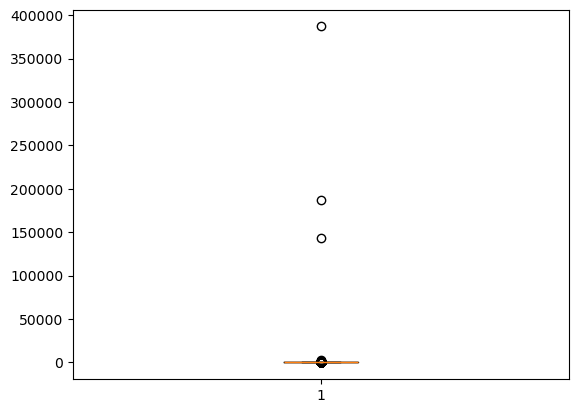

In [92]:
plt.boxplot(df["fare_amount"])

In [93]:
# there are too many outliers in the data, because this is just not 
# possible for a person to pay $400000 as a fare_amount
# we remove them.



## we will use interquartile range to remove the outliers

In [94]:
for col in ["fare_amount" , "trip_distance" , "duration"]:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    IQR = q3-q1

    lower_bound = q1 - 1.5 * IQR
    upper_bound = q3 + 1.5 * IQR

    df = df[(df[col] >= lower_bound) &
    (df[col] <= upper_bound )]

In [95]:
df

,passenger_count,payment_type,fare_amount,trip_distance,duration
0,2,Card,12.1,1.51,0 days 00:10:59
1,1,Card,5.8,0.40,0 days 00:05:01
3,1,Card,11.4,1.60,0 days 00:12:22
5,1,Cash,10.7,1.81,0 days 00:07:16
6,1,Cash,7.2,1.24,0 days 00:03:57
...,...,...,...,...,...
34927166,1,Card,6.5,0.62,0 days 00:04:50
34927167,2,Card,9.3,1.20,0 days 00:07:47
34927169,1,Cash,19.1,3.33,0 days 00:17:11
34927171,1,Cash,8.6,1.00,0 days 00:06:38


In [96]:
# Preference based on trip_distance

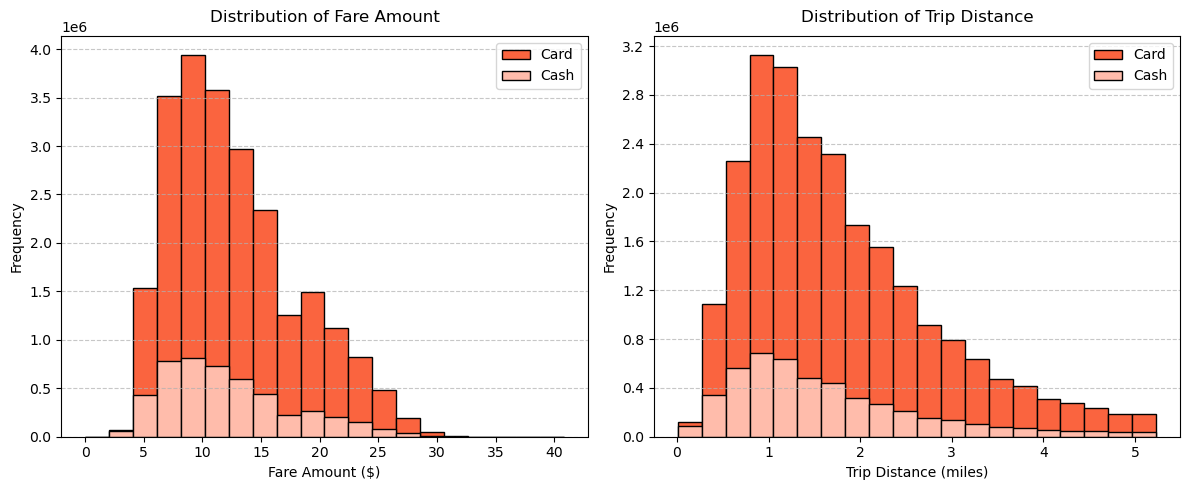

In [102]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

plt.figure(figsize=(12, 5))

# Plot 1: Distribution of fare amount
plt.subplot(1, 2, 1)
plt.title("Distribution of Fare Amount", fontsize=12, pad=10)
plt.hist(df[df["payment_type"] == "Card"]["fare_amount"], 
         histtype='barstacked', bins=20, edgecolor="k", 
         color='#FA643F', label="Card")
plt.hist(df[df["payment_type"] == "Cash"]["fare_amount"], 
         histtype='barstacked', bins=20, edgecolor="k", 
         color='#FFBCAB', label="Cash")
plt.xlabel("Fare Amount ($)", fontsize=10)
plt.ylabel("Frequency", fontsize=10)
plt.legend()
plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(integer=True))  # Force integer x-axis
plt.gca().yaxis.set_major_locator(ticker.MaxNLocator(integer=True))  # Force integer y-axis
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Plot 2: Distribution of trip distance
plt.subplot(1, 2, 2)
plt.title("Distribution of Trip Distance", fontsize=12, pad=10)
plt.hist(df[df["payment_type"] == "Card"]["trip_distance"], 
         histtype='barstacked', bins=20, edgecolor="k", 
         color='#FA643F', label="Card")
plt.hist(df[df["payment_type"] == "Cash"]["trip_distance"], 
         histtype='barstacked', bins=20, edgecolor="k", 
         color='#FFBCAB', label="Cash")
plt.xlabel("Trip Distance (miles)", fontsize=10)
plt.ylabel("Frequency", fontsize=10)
plt.legend()
plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(integer=True))  # Force integer x-axis
plt.gca().yaxis.set_major_locator(ticker.MaxNLocator(integer=True))  # Force integer y-axis
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()  # Prevent overlapping elements
plt.show()

In [103]:
df.groupby('payment_type').agg({'fare_amount':['mean','std'], 'trip_distance':['mean','std']})

fare_amount           trip_distance          
                    mean       std          mean       std
payment_type                                              
Card           12.835093  5.340770      1.775891  1.043299
Cash           12.230583  5.353723      1.632359  1.048686

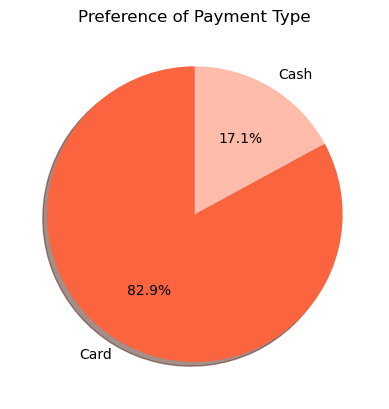

In [109]:
plt.title('Preference of Payment Type')
plt.pie(df["payment_type"].value_counts(normalize = True),labels = df["payment_type"].value_counts().index,
        startangle = 90 , shadow = True, autopct = "%1.1f%%", colors = ["#FA643F" , "#FFBCAB"])
plt.show()
        

In [110]:
passenger_count = df.groupby(['payment_type' , 'passenger_count'])[['passenger_count']].count()
passenger_count.rename(columns = {'passenger_count':'count'}, inplace = True)
passenger_count.reset_index(inplace = True)

In [113]:
passenger_count['perc'] = (passenger_count['count']/passenger_count['count'].sum()) * 100

In [115]:
passenger_count

,payment_type,passenger_count,count,perc
0,Card,1,18378328,65.255257
1,Card,2,3399689,12.071151
2,Card,3,838977,2.978925
3,Card,4,416955,1.480467
4,Card,5,320911,1.139447
5,Cash,1,3580157,12.711932
6,Cash,2,792929,2.815424
7,Cash,3,216963,0.770363
8,Cash,4,150151,0.533136
9,Cash,5,68691,0.243899


In [117]:
# we create a custom dataframe to store the values in order to create a stacked barchart

new_df = pd.DataFrame(columns = ["payment_type",1,2,3,4,5])
new_df ['payment_type'] = ["Card" , "Cash"]
new_df .iloc[0,1:] = passenger_count.iloc[0:5,-1]
new_df .iloc[1,1:] = passenger_count.iloc[5:,-1]
new_df 

,payment_type,1,2,3,4,5
0,Card,65.255257,12.071151,2.978925,1.480467,1.139447
1,Cash,12.711932,2.815424,0.770363,0.533136,0.243899


<Axes: ylabel='payment_type'>

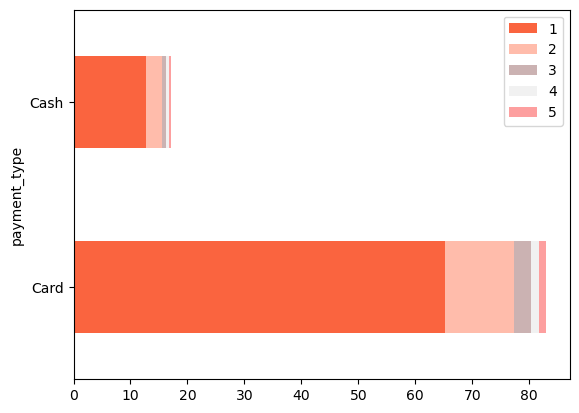

In [119]:
new_df.plot(x = "payment_type" , kind = "barh" ,  stacked = True , color = ["#FA643F", "#FFBCAB", "#CBB2B2", "#F1F1F1", "#FD9F9F"])

Null hypothesis : There is no difference in average fare between customers who use credit cards and customers who use cash.

Alternative hypothesis :There is a difference in average fare between customers who use credit cards and customers who use cash

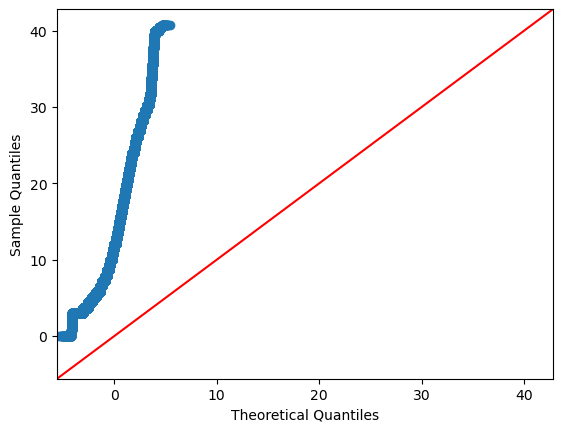

In [122]:
sm.qqplot(df["fare_amount"], line = "45")
plt.show()

In [123]:
card_sample = df[df['payment_type'] == "Card"]['fare_amount']
cash_sample = df[df['payment_type'] == "Cash"]['fare_amount']

In [124]:
t_stats , p_value = st.ttest_ind(a = card_sample , b = cash_sample , equal_var = False)
print("T statistic" , t_stats , "p-value" , p_value)

T statistic 225.5759033208643 p-value 0.0
